In [1]:
from pandas_datareader import data
import matplotlib.pyplot as plt
import pandas as pd
import datetime as dt
import urllib.request, json
import os
import numpy as np
import tensorflow as tf # This code has been tested with TensorFlow 1.6
from sklearn.preprocessing import MinMaxScaler
import csv
import scalar

import yfinance as yf

scalar 2018-09-10T2016Z


In [2]:
def update():
    stored_data = pd.read_csv("data.csv")

    bottom = (stored_data.tail(1)).to_string()
    start_date = bottom[83:93] #YYYY-MM-DD

    data = yf.download("WTI",start=start_date, period="60d", interval="5m")

    data = midCalc(dateNormalisation(data))

    return(merge(data, stored_data))



In [3]:
def dateNormalisation(data):
    data = data.sort_values("Datetime")

    dates = []

    for x in data.iterrows():
        newdate = str(x)
        newdate = newdate[12:31]
        dates.append(newdate)

    data.insert(0, "Date", dates)
    data.set_index('Date', inplace=True)

    return(data)


In [4]:
def midCalc(data):
    high_prices = data.loc[:,'High'].values
    low_prices = data.loc[:,'Low'].values
    mid_prices = (high_prices+low_prices)/2.0
    data.insert(2, "Mid", mid_prices)

    return(data)

In [5]:
def merge(data, stored_data):
    data.to_csv(r'new_data.csv', index = True)
    new_data = pd.read_csv("new_data.csv")

    stored_data.set_index('Date', inplace=True)

    new_data.reset_index(drop=True, inplace=True)

    result = pd.concat([stored_data,data], sort=True)
    result.to_csv(r'data.csv', index = True)

    return(result)


In [6]:
def plot(data):
    plt.figure(figsize = (18,9))
    data['Mid'].plot()
    plt.xlabel("Date")
    plt.ylabel("Adjusted")
    plt.title("WTI")
    plt.style.use('dark_background')
    plt.show()


[*********************100%***********************]  1 of 1 completed


/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  
/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until


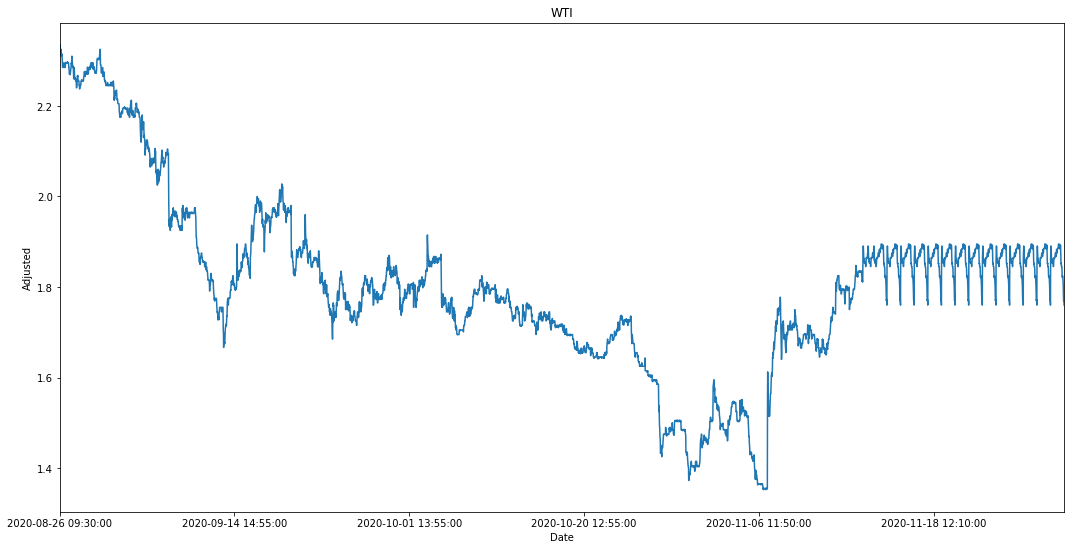